In [1]:
import numpy as np

data =np.load('data.npy')
target = np.load('target.npy')

#loading the data/target from previous code 

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(256,(3,3), input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by relu activation and MaxPooling

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second layer of CNN followed by relu activation and MaxPooling

model.add(Flatten())
#Flatten layet to stack the output from the convolutions from second convolution layer

model.add(Dense(64, activation= 'relu'))
#dense layer of 64 neurons

model.add(Dense(2,activation='softmax'))
#the final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])


Using TensorFlow backend.


In [3]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.1)

In [4]:
train_infor=model.fit(train_data,train_target, epochs=10)

Epoch 1/10
22451/22451 [==============================] - 425s 19ms/step - loss: 0.6426 - accuracy: 0.6239
Epoch 2/10
22451/22451 [==============================] - 438s 19ms/step - loss: 0.5510 - accuracy: 0.7222
Epoch 3/10
22451/22451 [==============================] - 394s 18ms/step - loss: 0.4990 - accuracy: 0.7584
Epoch 4/10
22451/22451 [==============================] - 393s 18ms/step - loss: 0.4722 - accuracy: 0.7752
Epoch 5/10
22451/22451 [==============================] - 393s 18ms/step - loss: 0.4509 - accuracy: 0.7890
Epoch 6/10
22451/22451 [==============================] - 392s 17ms/step - loss: 0.4212 - accuracy: 0.8050
Epoch 7/10
22451/22451 [==============================] - 396s 18ms/step - loss: 0.4018 - accuracy: 0.8181
Epoch 8/10
22451/22451 [==============================] - 399s 18ms/step - loss: 0.3812 - accuracy: 0.8270
Epoch 9/10
22451/22451 [==============================] - 398s 18ms/step - loss: 0.3550 - accuracy: 0.8425
Epoch 10/10
22451/22451 [============

In [5]:
from matplotlib import pyplot as plt 

plt.plot(train_infor.history['loss'])

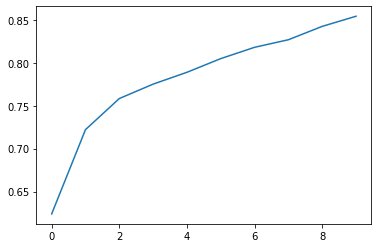

In [6]:
plt.plot(train_infor.history['accuracy'])

In [7]:
print(model.evaluate(test_data, test_target))

2495/2495 [==============================] - 15s 6ms/step
[0.5162005451494802, 0.7775551080703735]
